In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_processing.loader import load_time_bucket_data

In [11]:
def plot_feature_distributions(token_time_buckets, feature_names):
    # Concatenate all X arrays: (total_samples, 300, num_features)
    all_sequences = np.concatenate([token_data['X'] for token_data in token_time_buckets.values()], axis=0)

    # Flatten to (total_samples * 300, num_features)
    flattened = all_sequences.reshape(-1, all_sequences.shape[2])

    # Remove rows where all features are zero (padding)
    non_zero_rows = ~np.all(flattened == 0, axis=1)
    filtered = flattened[non_zero_rows]

    num_features = filtered.shape[1]

    # Sanity check
    if num_features != len(feature_names):
        print(f"Warning: number of features ({num_features}) does not match number of labels ({len(feature_names)}).")
        feature_names = [f"Feature {i}" for i in range(num_features)]

    # Plot distributions
    fig, axes = plt.subplots(num_features, 1, figsize=(10, 4 * num_features))

    for i in range(num_features):
        feature_data = filtered[:, i]
        f_min = np.min(feature_data)
        f_max = np.max(feature_data)
        f_mean = np.mean(feature_data)

        ax = axes[i] if num_features > 1 else axes
        ax.hist(feature_data, bins=50, alpha=0.7, color='skyblue')
        ax.set_yscale('log')  # 🔍 Apply log scale to y-axis
        ax.set_title(
            f"{feature_names[i]} | min={f_min:.3e}, max={f_max:.3e}, mean={f_mean:.3e}"
        )
        ax.set_xlabel("Feature Value")
        ax.set_ylabel("Frequency (log)")

    plt.tight_layout()
    plt.show()


def plot_target_distributions(token_time_buckets):
    all_targets = np.concatenate([token_data['y'] for token_data in token_time_buckets.values()], axis=0)
    
    plt.figure(figsize=(8, 6))
    sns.histplot(all_targets, kde=True, color='green', bins=50)
    plt.title("Distribution of Target Variable (y)")
    plt.xlabel("Target Value")
    plt.ylabel("Frequency")
    plt.show()

def analyze_token_concentration(token_time_buckets):
    token_sizes = {token: data['X'].shape[0] for token, data in token_time_buckets.items()}
    sample_sizes = list(token_sizes.values())
    
    mean_size = np.mean(sample_sizes)
    median_size = np.median(sample_sizes)
    print(f"Mean samples per token: {mean_size:.2f}")
    print(f"Median samples per token: {median_size:.2f}")
    print(f"Max samples in a token: {max(sample_sizes)}")
    print(f"Min samples in a token: {min(sample_sizes)}")

In [3]:
# Assuming you've defined load_time_bucket_data earlier
token_time_buckets, config = load_time_bucket_data()

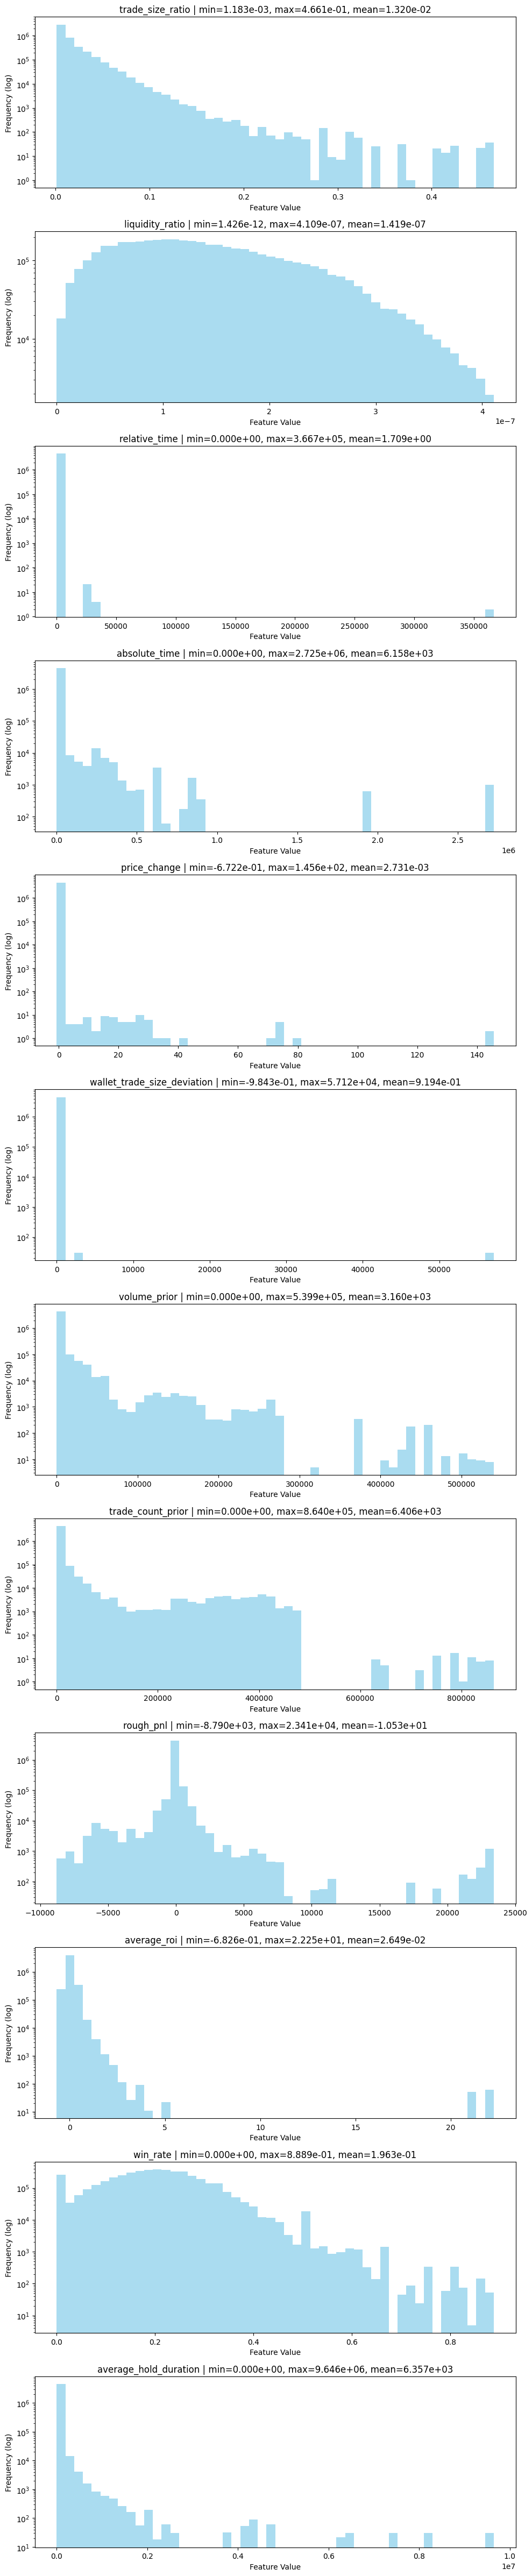

In [12]:
# Define feature names in the order they appear in the FeaturesConfig class
feature_names = [
    "trade_size_ratio",
    "liquidity_ratio",
    "relative_time",
    "absolute_time",
    "price_change",
    "wallet_trade_size_deviation",
    "volume_prior",
    "trade_count_prior",
    "rough_pnl",
    "average_roi",
    "win_rate",
    "average_hold_duration"
]

plot_feature_distributions(token_time_buckets, feature_names=feature_names)


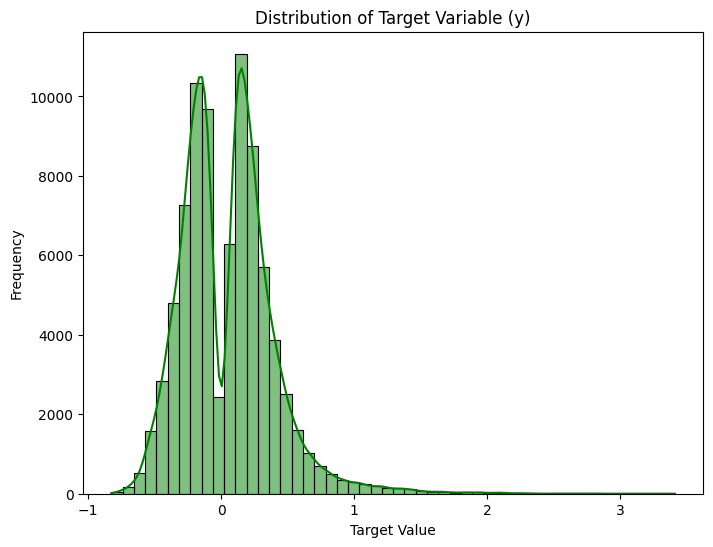

In [5]:
plot_target_distributions(token_time_buckets)


In [6]:
analyze_token_concentration(token_time_buckets)


Mean samples per token: 243.57
Median samples per token: 198.00
Max samples in a token: 1338
Min samples in a token: 1
